# Algorithms Exercise 2

## Imports

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

## Peak finding

Write a function `find_peaks` that finds and returns the indices of the local maxima in a sequence. Your function should:

* Properly handle local maxima at the endpoints of the input array.
* Return a Numpy array of integer indices.
* Handle any Python iterable as input.

In [2]:
def find_peaks(a):
    """Find the indices of the local maxima in a sequence."""
    lst = [i for i in a]
    array = []
    if lst[0] > lst[1]:
        array.append(0)
    for i in range(1,len(lst) - 1):
        if lst[i] > lst[i-1] and lst[i] > lst[i+1]:
            array.append(i)
    if lst[-1] > lst[-2]:
        array.append(len(lst)-1)
    return np.array([i for i in array])

In [3]:
p1 = find_peaks([2,0,1,0,2,0,1])
assert np.allclose(p1, np.array([0,2,4,6]))
p2 = find_peaks(np.array([0,1,2,3]))
assert np.allclose(p2, np.array([3]))
p3 = find_peaks([3,2,1,0])
assert np.allclose(p3, np.array([0]))

Here is a string with the first 10000 digits of $\pi$ (after the decimal). Write code to perform the following:

* Convert that string to a Numpy array of integers.
* Find the indices of the local maxima in the digits of $\pi$.
* Use `np.diff` to find the distances between consequtive local maxima.
* Visualize that distribution using an appropriately customized histogram.

In [4]:
from sympy import pi, N
pi_digits_str = str(N(pi, 10001))[2:]

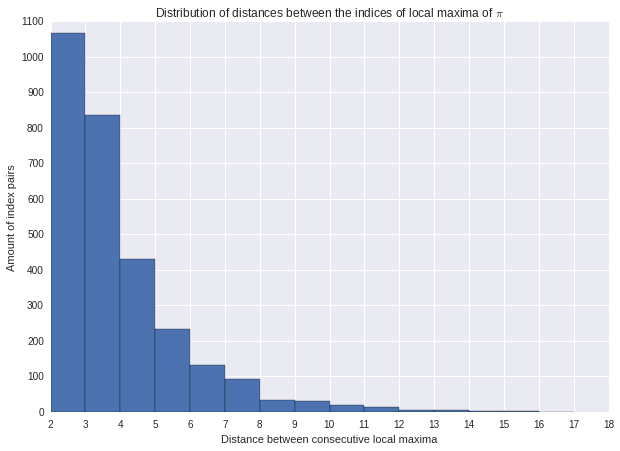

In [5]:
dig = np.array([i for i in pi_digits_str])
val = find_peaks(dig)
diff = np.diff(val)

#just the biggest value in difference. let's me know how many bins i'm going to need
bincount = np.amax(diff)
#this is sort of meant to compute the amount of values that have difference between maximum of 2.
#I knew 2 would refer the highest amount of values because I plotted the graph first. I will set my ylim around this
#value
def tot(diff):
    count = 0
    for i in diff:
        if i == 2:
            count +=1
    return count

#I'm setting the xlim on the left hand side to 2 because it's impossible for a difference of 1 to register
#between indices of local maxima (The criteria was that the value of the original list was bigger than it's
#neighboring values)
plt.figure(figsize=(10,7))
plt.hist(diff,bins=range(1,bincount),align="mid",rwidth=10);
plt.xlim(2,bincount);
plt.ylim(0,tot(diff));
plt.xticks([i for i in range(2,bincount+1)],[i for i in range(2,bincount+1)]);
plt.yticks([i for i in range(0,tot(diff)+100,100)],[i for i in range(0,tot(diff)+100,100)])
plt.title("Distribution of distances between the indices of local maxima of $\pi$");
plt.ylabel("Amount of index pairs");
plt.xlabel("Distance between consecutive local maxima")

In [6]:
assert True # use this for grading the pi digits histogram